    Pohl2008: arxiv:0712.4264
    Fits avalibal at http://www.app.physik.uni-potsdam.de/gas.html 

In [2]:
import pandas as pd
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
from astropy.io import fits
from mpl_toolkits.mplot3d import Axes3D

In [51]:
with fits.open('/home/home1/jdo/Dokumente/Python Codes/Pohl 2008/3D_density_distribution.fit') as data:		# Achsenfolge [z][y][x]
    for d in data:
        D= d.data.mean(axis=0)
        F=d.data.sum(axis=0)
        D2=d.data.mean(axis=1)   #x-z-Plot
        D3=d.data.mean(axis=2)   #y-z-Plot
        print(d.header)
        

SIMPLE  =                    T / Written by IDL:  Sun Mar 22 12:11:37 2009      BITPIX  =                  -32 / 16-bit twos complement binary integer          NAXIS   =                    3  / Number of axes                                NAXIS1  =                  300 // Number pixels on axis 1                       NAXIS2  =                  300 // Number pixels on axis 2                       NAXIS3  =                   40 // Number pixels on axis 3                       CTYPE1  = 'x IN PC '           / axis 1 coord type                              CRVAL1  =             -14950.0 // coord value at CRPIX1                         CDELT1  =              100.000 // pixel spacing for axis 1                      CRPIX1  =                    1 // ref pixel for axis 1                          CTYPE2  = 'y IN PC '           / axis 2 coord type                              CRVAL2  =             -14950.0 // coord value at CRPIX2                         CDELT2  =              100.000 // pixel 

 [astropy.io.fits.verify]


In [164]:
matplotlib.rcParams.update({'font.size': 22})

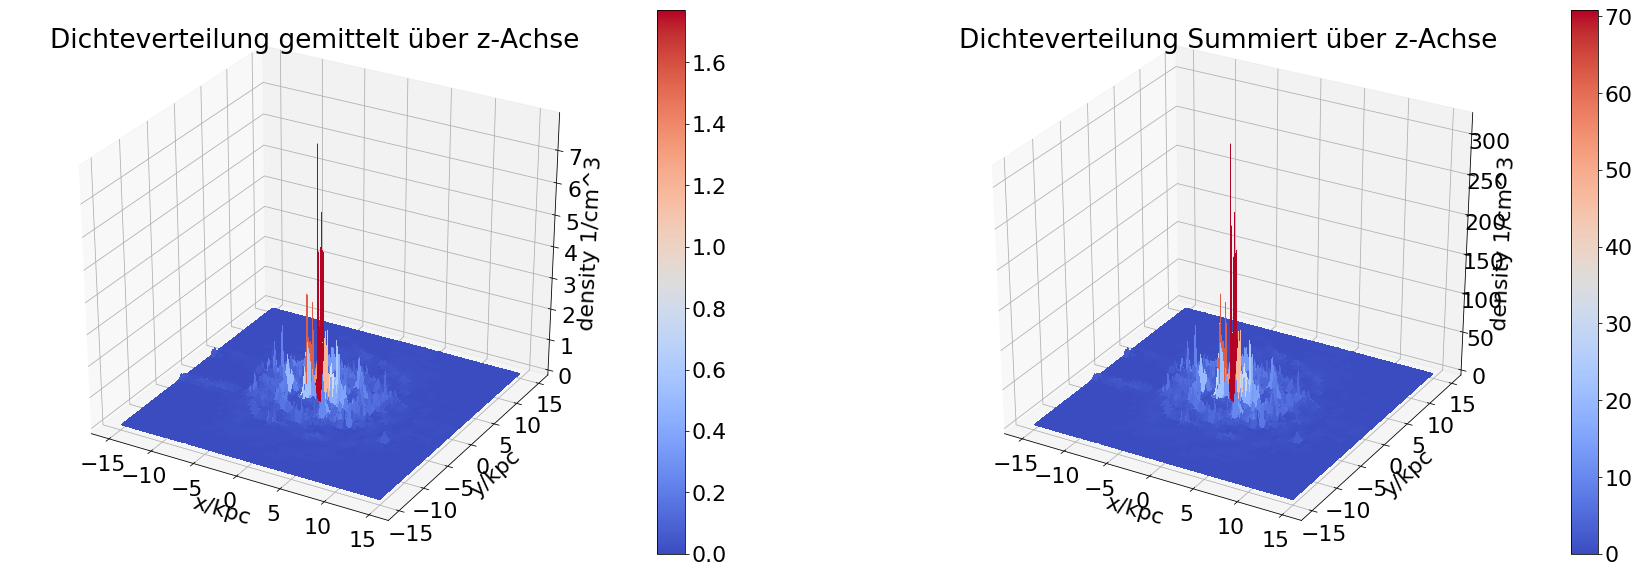

In [165]:
fig = plt.figure(figsize=(30,10))
X,Y = np.meshgrid(np.linspace(-14950,14950,300),np.linspace(-14950,14950,300))

ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(X/1000, Y/1000, D, cmap=cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p)
ax.set_zlabel('density 1/cm^3')
ax.set_ylabel('y/kpc')
ax.set_xlabel('x/kpc')
ax.set_title('Dichteverteilung gemittelt über z-Achse')

ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X/1000, Y/1000, F, cmap=cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p)
ax.set_zlabel('density 1/cm^3')
ax.set_ylabel('y/kpc')
ax.set_xlabel('x/kpc')
ax.set_title('Dichteverteilung Summiert über z-Achse')

plt.show()


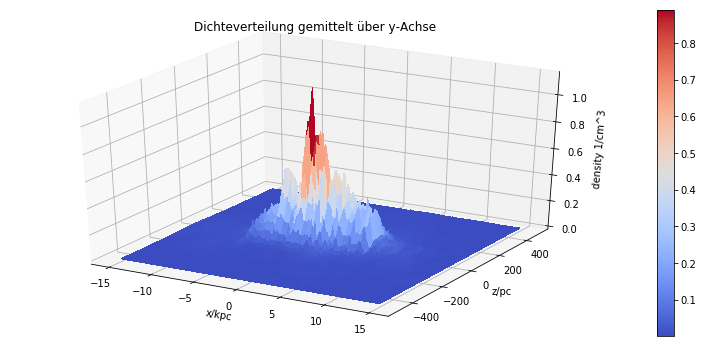

In [78]:
fig = plt.figure(figsize=(30,6))
X,Z = np.meshgrid(np.linspace(-14950,14950,300),np.linspace(-487.5,487.5,40))

ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X/1000, Z, D2, cmap=cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p)
ax.set_zlabel('density 1/cm^3')
ax.set_ylabel('z/pc')
ax.set_xlabel('x/kpc')
ax.set_title('Dichteverteilung gemittelt über y-Achse')
plt.show()

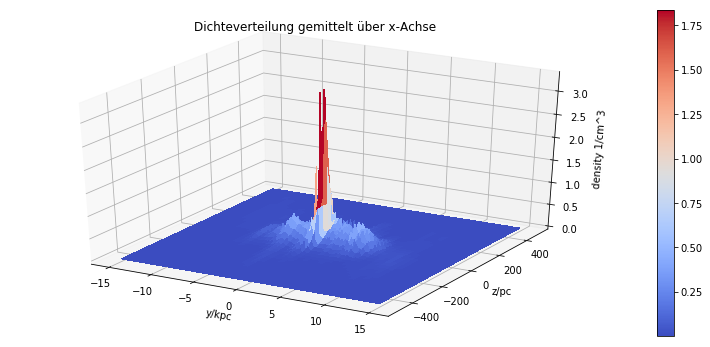

In [79]:
fig = plt.figure(figsize=(30,6))
Y,Z = np.meshgrid(np.linspace(-14950,14950,300),np.linspace(-487.5,487.5,40))

ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(Y/1000, Z, D3, cmap=cm.coolwarm, antialiased=False)
cb = fig.colorbar(p)
ax.set_zlabel('density 1/cm^3')
ax.set_ylabel('z/pc')
ax.set_xlabel('y/kpc')
ax.set_title('Dichteverteilung gemittelt über x-Achse')
plt.show()

In [119]:
"""Logarithmieren der Werte"""
E1 = np.zeros((300,300))
E2 = np.zeros((40,300))
E3 = np.zeros((40,300))
for i in range(300):
    for j in range(300):
        if D[i,j]>10**-3:
            E1[i,j]=np.log10(D[i,j])
        else:
            E1[i,j]=np.nan
for i in range(40):
    for j in range(300):
        if D2[i,j]>10**-3:
            E2[i,j]=np.log10(D2[i,j])
        else:
            E2[i,j]=np.nan
        if D3[i,j]>10**-3:
            E3[i,j]=np.log10(D3[i,j])
        else:
            E3[i,j]=np.nan

/usr/lib/python3/dist-packages/matplotlib/colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


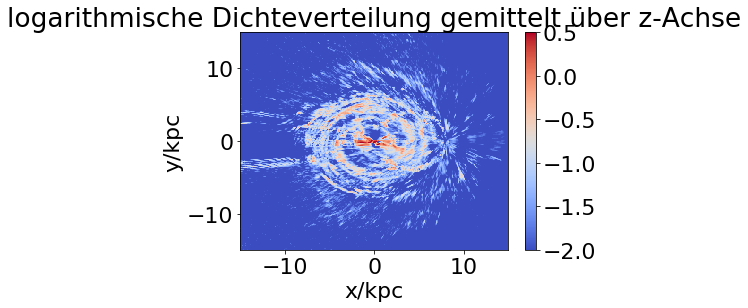

In [166]:
fig, ax = subplots()

p = ax.pcolor(X/1000, Y/1000, E1, cmap=cm.coolwarm, vmin=-2, vmax=0.5)
cb = fig.colorbar(p)

ax.set_ylabel('y/kpc')
ax.set_xlabel('x/kpc')
plt.title('logarithmische Dichteverteilung gemittelt über z-Achse')
plt.show()


In [114]:
xz, zx= np.meshgrid(np.linspace(-14950,14950,300),np.linspace(-487.5,487.5,40))


(40, 300)
(40, 300)


/usr/lib/python3/dist-packages/matplotlib/colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


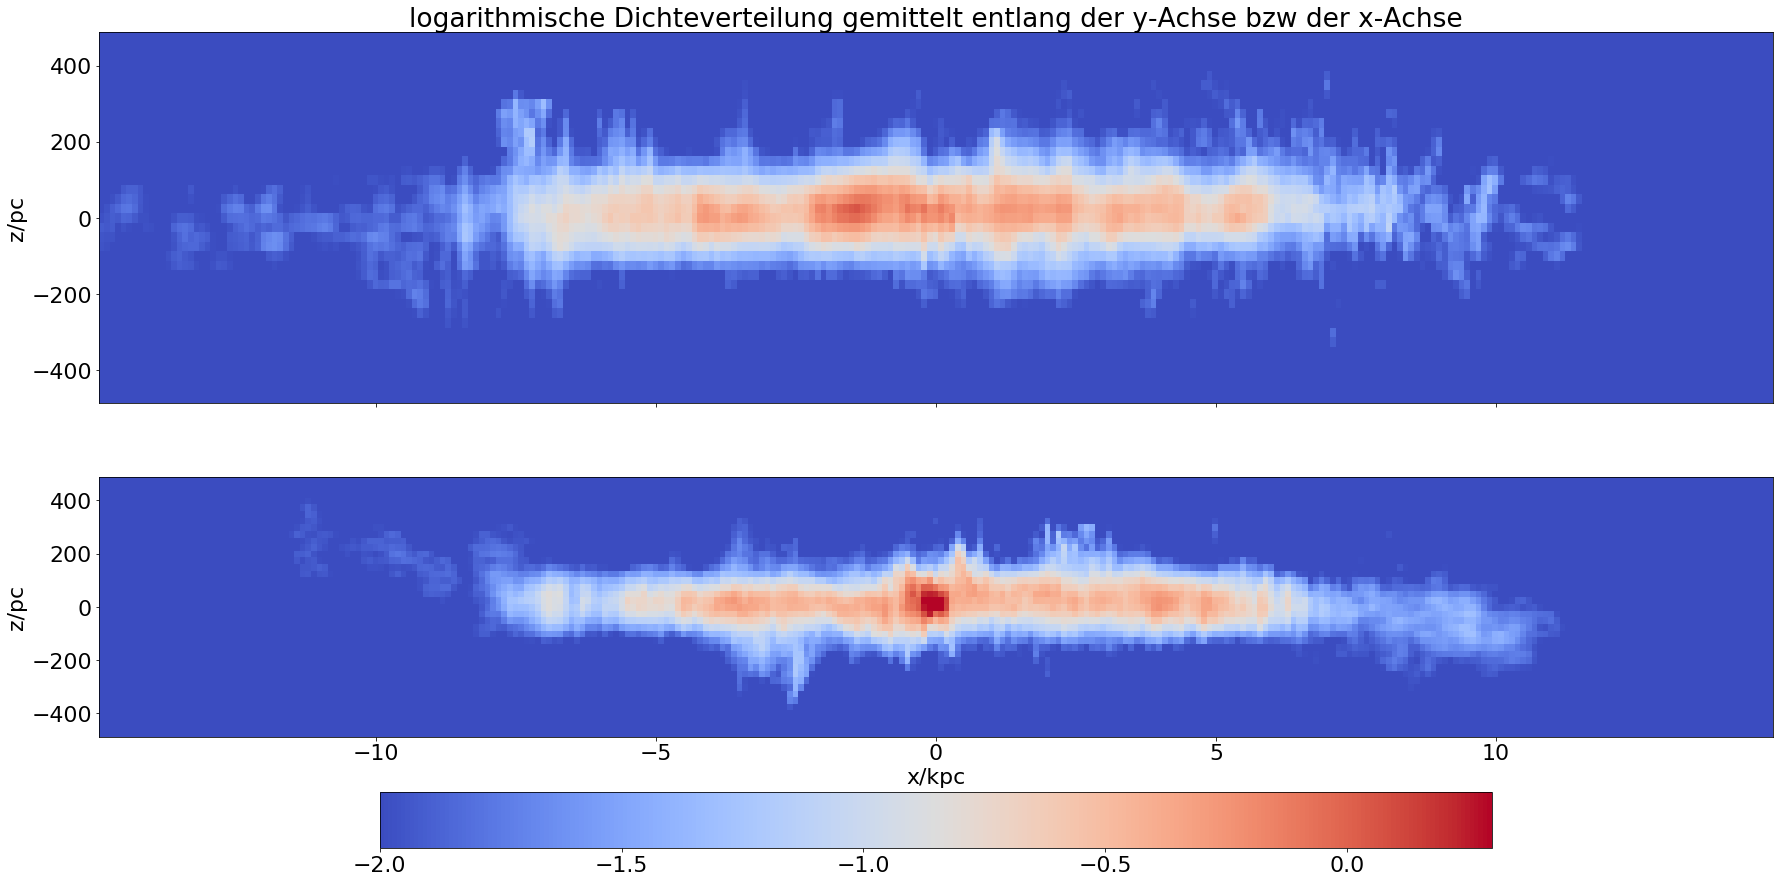

In [169]:
fig, axes = subplots(2, 1, figsize=(30,15),sharex=True)
p1=axes[0].pcolor(xz/1000,zx,E2,cmap = cm.coolwarm,vmin=-2,vmax=0.3)
cb1=fig.colorbar(p1,orientation='horizontal')
axes[0].set_ylabel('z/pc')
axes[1].set_ylabel('z/pc')
axes[1].set_xlabel('x/kpc')
axes[0].set_title('logarithmische Dichteverteilung gemittelt entlang der y-Achse bzw der x-Achse')

p2=axes[1].pcolor(xz/1000,zx,E3,cmap =cm.coolwarm, vmin=-2,vmax=0.3)
plt.show()